<a href="https://colab.research.google.com/github/ParhamPishro/Some-of-Algorithms-in-Data-Science/blob/main/2DimensionalityReduction/2.3ManifoldLearning/2.3.1KPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel PCA

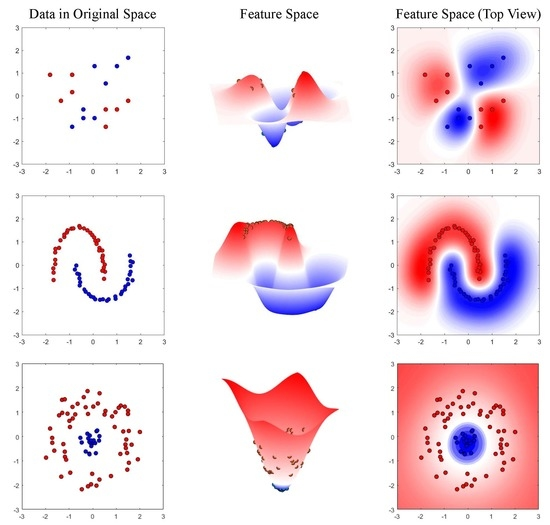

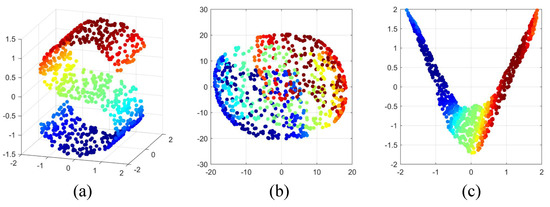

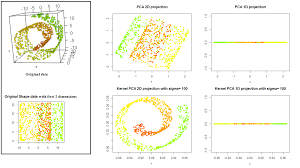

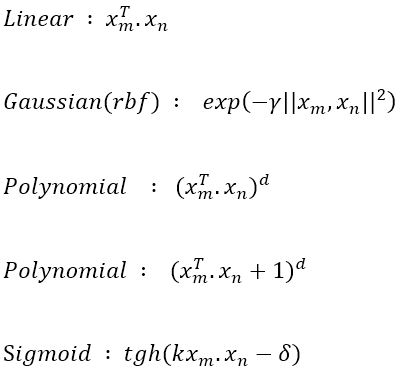

In [113]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import confusion_matrix


### **Sample 1**

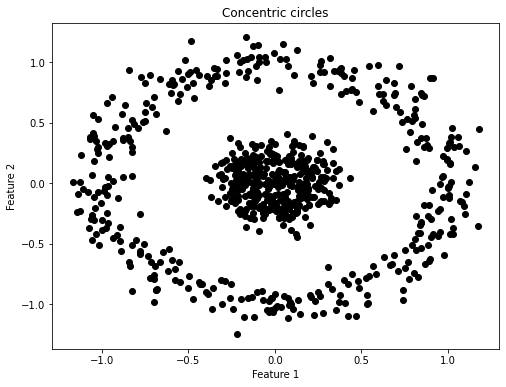

In [64]:
X, y = make_circles(n_samples=750, random_state=10, noise=0.1, factor=0.2)
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], color='black')
plt.title('Concentric circles')
plt.ylabel('Feature 2') 
plt.xlabel('Feature 1')
plt.show()

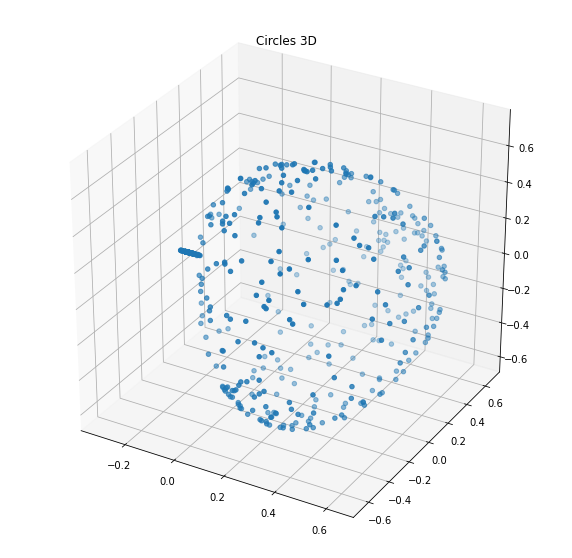

In [65]:
kpca = KernelPCA(n_components = 3,gamma=20, kernel = 'rbf') 
X_kpca = kpca.fit_transform(X)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2], cmap=plt.cm.rainbow)
plt.title('Circles 3D')
plt.show()

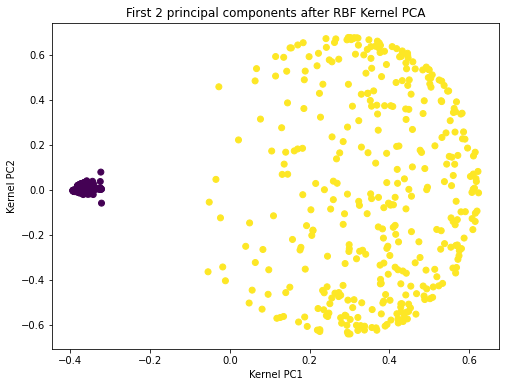

In [66]:
kpca = KernelPCA(n_components = 2,gamma=9, kernel = 'rbf') 
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('First 2 principal components after RBF Kernel PCA')
#plt.text(-0.18, 0.18, 'gamma = 15', fontsize=12)
plt.xlabel('Kernel PC1')
plt.ylabel('Kernel PC2')
plt.show()

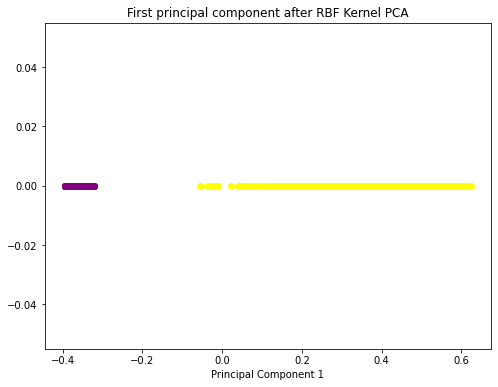

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], np.zeros((375)), color='purple')
plt.scatter(X_kpca[y==1, 0], np.zeros((375)), color='yellow')
plt.title('First principal component after RBF Kernel PCA')

plt.xlabel('Principal Component 1')
plt.show()

### **Sample 2**

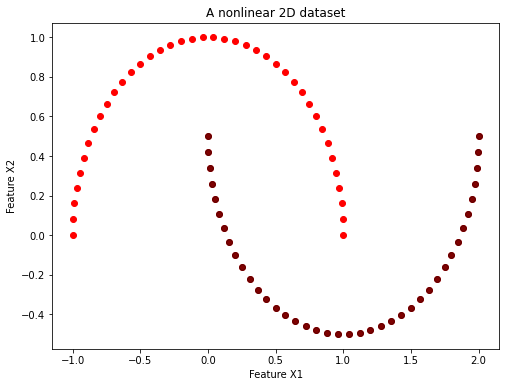

In [74]:
X, y = make_moons(n_samples=80, random_state=5)

#Setup size of chart
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='black', alpha=0.5)
plt.title('A nonlinear 2D dataset') 
plt.ylabel('Feature X2')
plt.xlabel('Feature X1')
plt.show()


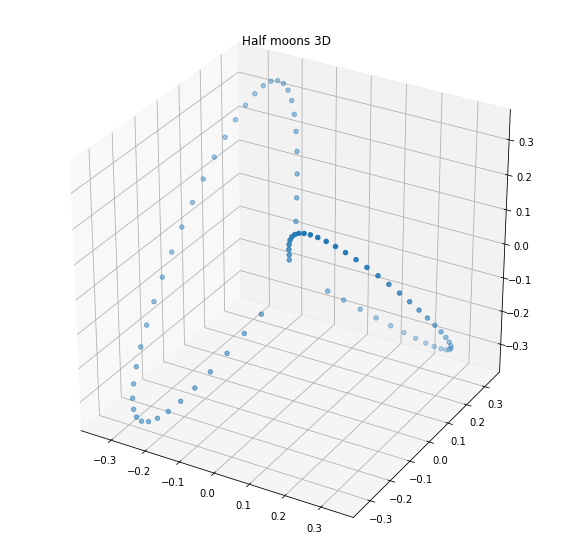

In [75]:
kpca = KernelPCA(n_components = 3,gamma=20, kernel = 'rbf') 
X_kpca = kpca.fit_transform(X)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2])
plt.title('Half moons 3D')
plt.show()

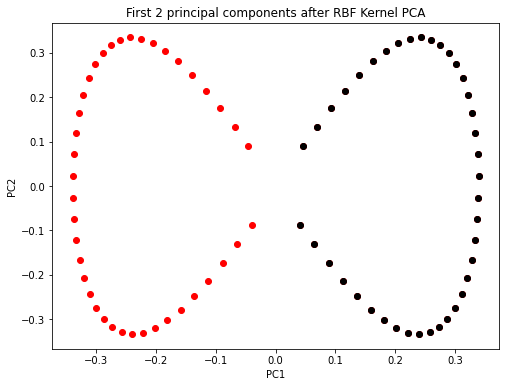

In [76]:
kpca = KernelPCA(n_components = 2,gamma=20, kernel = 'rbf') 
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], color='red')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='black')
plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

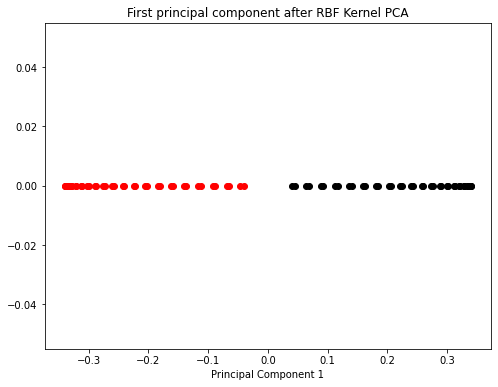

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], np.zeros((40)), color='red')
plt.scatter(X_kpca[y==1, 0], np.zeros((40)), color='black')
plt.title('First principal component after RBF Kernel PCA')

plt.xlabel('Principal Component 1')
plt.show()

In [81]:
#read data

from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_excel('/content/gdrive/My Drive/DataSet/Escaperoom.xlsx')

Mounted at /content/gdrive


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [91]:
features = df.values[:,:9]
target = df.values[:,10:]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size= 0.2)

In [104]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(features_train)
X_test = kpca.transform(features_test)

In [114]:

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, target_train)# Predicting the Test set results
y_pred = classifier.predict(X_test)# Making the Confusion Matrix
confusion_matrix(target_test, y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[69,  0],
       [54,  0]])